# Project 3

Ruben Pena  
UN55550.2018    
Due September 29, 2018  

In [1]:
# Imports, settings, and etc.
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
import sys
print ('Python version:', sys.version, '\n')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Python version: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)] 



## Part 1
## Each of the following processes involves sampling from a population. Please identify/define the population for each process. What is the parameter that is of interest?

#### A. A company runs a chemical process 20 times; the yield is measured each time.
    - Population: The population for this process would be all of the times that process has been run.
    - Parameter of Interest: The parameter of interest is the sample mean of yields taken each time in order to discern the    population mean yield.
#### B. A pollster samples 1000 registered voters in Michigan, and asks them which candidate they support for governor.
    - Population: All registered voters in Michigan.
    - Parameter of Interest: Which candidate each voter supports in order to TRY to predict how the population may vote.
#### C. A clinical trial seeks to determine if a new drug lowers cholesterol. 100 people with high cholesterol levels are recruited to try the new drug.
    - Population: Everyone with high cholesterol.
    - Parameter of Interest: Cholesterol levels of those trying the new drug vs those on placebos depending on blind testing methods used. Used to give an estimate on the viabilty of this drug working for the overall population of patients with high cholesterol. 
#### D. Eight concrete polymers are produced using a new formulation, and the compressive strength of each is measured.
    - Population: Each concrete polymer is its own separate population. Multiple samples from EACH should be measured.
    - Parameter of Interest: Compressive strength of EACH population to be compared against the others.
#### E. A quality engineer needs to estimate the percentage of bolts, manufactured on a certain day, that meets a strength specification. At 3 pm in the afternoon, he samples the last 100 bolts to be manufactured.
    - Population: All bolts made on that specific day would be the population for this study assuming he is ONLY interested in bolts manufactured on this day.
    - Parameter of Interest: Sample mean strength specification to estimate mean population strength specification.

## Part 2  Question 1  
Describe the cement.csv data set.

In [2]:
# Read 'concrete.csv' from Github raw into pandas data frame named concrete and print first 5 rows.
url='https://raw.githubusercontent.com/ongbw/UN5550-Fall2018/master/projects/data/concrete.csv'
concrete=pd.read_csv(url)
concrete.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300


Now that the file has been sucessfully read into pandas a quick check of the dimensions of the file can be done. This shows that there are 1030 rows and 9 columns.

In [3]:
#print dimensions of concrete
concrete.shape

(1030, 9)

Checking the Datatypes of the file is always helpful. Below it shows that most are floats with the exception of Age.

In [4]:
#print Index and Datatype information
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


It is always important to check for missing values early when using a new data set. Below shows that there are no missing values in this data set.

In [5]:
#count missing values in each column
concrete.isnull().sum(axis=0)

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

The majority of the data in this set are numerical. Pandas describe function shows descriptive statistics for each column in the data set.

In [6]:
#run descriptive statistics on each predictor
concrete.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.168,73.896,54.188,181.567,6.205,972.919,773.580,45.662,35.818
std,104.506,86.279,63.997,21.354,5.974,77.754,80.176,63.170,16.706
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.710
50%,272.900,22.000,0.000,185.000,6.400,968.000,779.500,28.000,34.445
75%,350.000,142.950,118.300,192.000,10.200,1029.400,824.000,56.000,46.135
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


The describe() outputs the information into an easily read table. Looking at the table, the column names are a little too lenghty for easy manipulation. The code chunk below renames the columns to something more intuitive and easy to call.

In [7]:
#Rename columns
cols=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Compressive Strength']
concrete.columns=cols
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300


Now that the column names have been changed, it is easier to manipulate the data. Below, the data has been subset into 3 variables based on the range of values within each column to be used in graph generation.

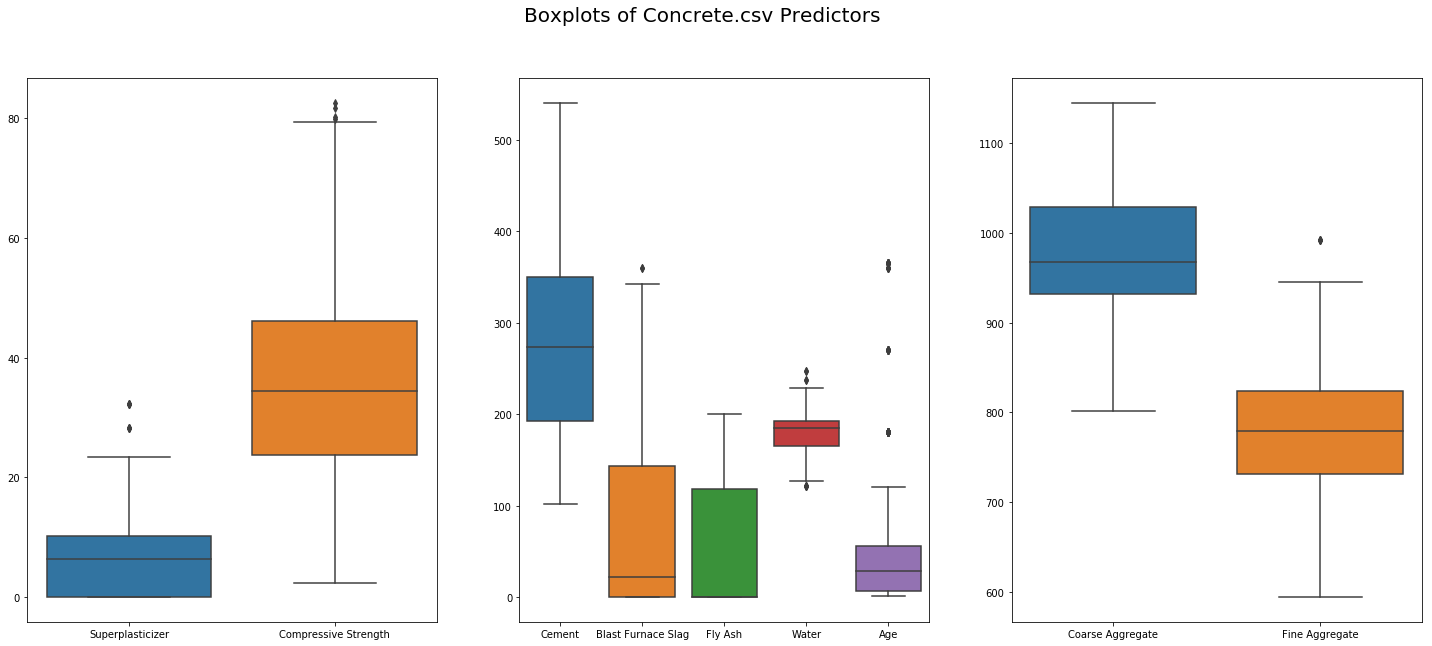

In [8]:
#subset data into ranges to improve visuals for boxplots
lower=concrete[["Superplasticizer","Compressive Strength"]]
mid=concrete[["Cement","Blast Furnace Slag","Fly Ash","Water","Age"]]
upper=concrete[["Coarse Aggregate","Fine Aggregate"]]

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25,10))
fig.suptitle("Boxplots of Concrete.csv Predictors", fontsize=20)
sns.boxplot(data=lower, ax=ax1)
sns.boxplot(data=mid, ax=ax2)
sns.boxplot(data=upper, ax=ax3)
plt.autoscale(True)
plt.show()

The boxplots above contain much of the same information found using describe(), but in visual format for quick interpretation and comparison.

It is easy to see that most of these variables are zero bound and only contain outliers beyond the upper fence.

Superplasticize, Compressive Strength, Blast Furnace Slag, Age, and Fine Aggregate all contain outliers beyond the upper fence.

Water contains outlier beyond both fences.

Cement, Fly Ash, and Course Aggregate do not appear to contain outliers. 

Next, a pair plot of scatter matrix and histograms will help identify distribution properties and correlations.

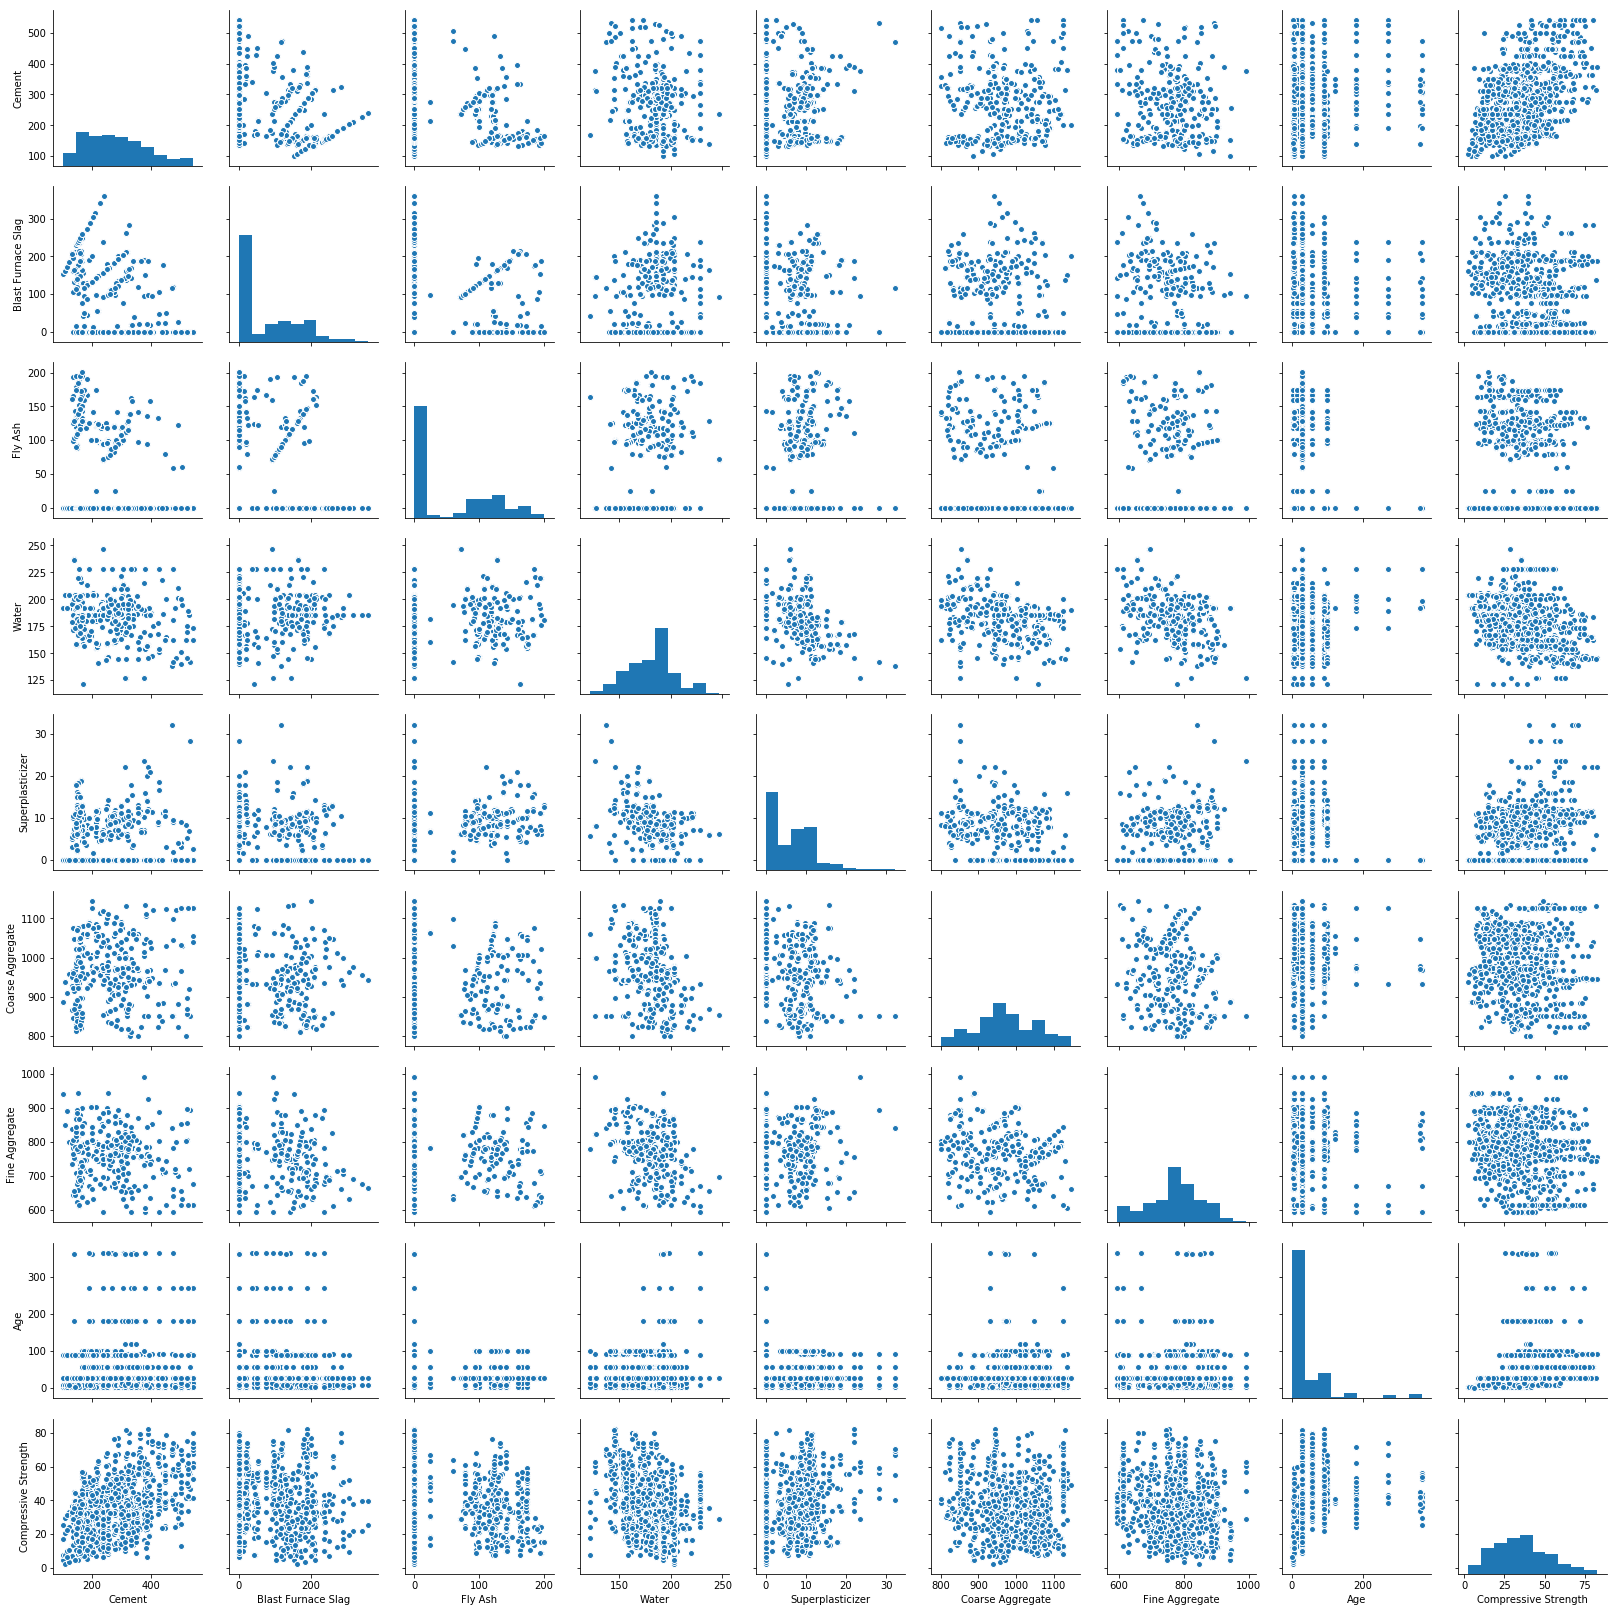

In [9]:
sns.pairplot(concrete,kind="scatter",palette="dark");

###### Distributions    
Cement - normally distributed  
Blast Furnace Ash - a very large distribution near zero with a smaller normally distributed populated  
Fly Ash - a very large distribution near zero with another population that appears to be normally distributed  
Water - left skewed   
Superplasticizer - moderatly skewed to the right   
Coarse Agg - normaly distruted  
Fine Agg - normally distributed  
Age - Strongly skewed to the right with most observations being near 0   
Compressive Strength - gently skewed to the right   

##### Relationships   
The only easily identifiable relationship based on the scatter plots would be the positive correlation between Cement and Compressive Strength.

### Part 2 Question 2
State, in your own words/understanding, the central limit theorem.

A great analogy that helped me understand the central limit theorem is based off a guessing game. The game at parties where guests are supposed to guess the number of jelly beans in a giant mason jar. If you looked at a only one or two guesses it might be way off from the actual number of jelly beans in the jar, but if you looked at more guess and took an average of them, that number tends to be eerily close to the actual number of jelly beans and gets closer with the number of samples averaged. Central limit theorom is based on similar findings; that the larger the number of samples of a population you have the closer you can approximate the average of the population. 


 ### Part 2 Question 3
 Run a numerical experiment, using the compressive strength variable, that demonstrates the central limit theorem at work.
 
 The code below demonstrates the CLT by first taking an average of 10 random samples of Compressive Strength and comparing it to the actual population(our population being a sample set of Compressive Strength measurements) average for our data.
 
 It is then measured against a sample of 100 random observations of Compressive Strength. As stated by the CLT, the 100 random observations is closer to the actual population mean.

In [10]:
mew=concrete["Compressive Strength"].mean()
round(mew,3)

35.818

In [11]:
#
avg10=concrete.loc[np.random.randint(0, len(concrete), 10),["Compressive Strength"]].sum()

In [12]:
sampleMean10=avg10/10
sampleMean10

Compressive Strength   33.979
dtype: float64

In [13]:
#compare against true pop mean
err10=mew-sampleMean10
err10

Compressive Strength   1.839
dtype: float64

In [14]:
avg100=concrete.loc[np.random.randint(0, len(concrete), 100),["Compressive Strength"]].sum()

In [15]:
sampleMean100=avg100/100
sampleMean100

Compressive Strength   36.034
dtype: float64

In [16]:
#Error is smaller than mew-sampleMean10
err100=mew-sampleMean100
err100

Compressive Strength   -0.216
dtype: float64

 ### Part 2 Question 4
 Suppose that a random sample of 60 observations are chosen. What is the probability that the sample mean of the compressive strength is less than 20 MPs?

In [17]:
sigma=concrete["Compressive Strength"].std()
mu=concrete["Compressive Strength"].mean()
print(round(sigma,3),round(mu,3))

16.706 35.818


In [18]:
n=60
test=20
samples=concrete.loc[np.random.randint(0,len(concrete),n), ["Compressive Strength"]]
xbar=samples.values.sum()/n
round(xbar,3)

31.682

In [19]:
prob=sp.stats.norm(xbar, sigma).pdf(20)
print("There is a ", prob*100, "% chance that sample mean is less than 20.")

There is a  1.8700563860629578 % chance that sample mean is less than 20.


In [20]:
#test accuracy of probabality
less20=len(concrete[concrete["Compressive Strength"]<20])
round(less20/len(concrete),3)

0.191

### Part 2 Question 5
Find the 70th upper percentile of the sample mean compressive strength.
 
*I wasn't sure whether you wanted of the sample from concrete.csv or the sample of n=60 from Question 4 so I did both.*
 

In [21]:
#70th Percentile of Compressive Strength
seventieth_percentile = np.percentile(concrete["Compressive Strength"], 70)
round(seventieth_percentile,3)

43.289

In [22]:
#70th Percentile of the n=60 sample of Compressive Strength from Q4
ofxbar = np.percentile(samples,70)
ofxbar

41.451

### Part 2 Question 6
Develop an appropriate hypothesis, and test using confidence intervals (see section 4.4.1)  
Source:Lab3 notebook

H-Null: Compressive Strength of samples that have aged less than 21 days accurately represent the population Compressive Strength. 

H-Alt: They do not accurately represent population mean.
 

In [23]:
n=60
alpha=0.20
young = concrete[concrete["Age"]<21]["Compressive Strength"]

In [36]:
observations = np.random.choice(young.index.values, n)
sampled_observations = young.loc[observations]
Xbar = round(sampled_observations.mean(),3)
mu = round(concrete["Compressive Strength"].mean(),3)
sigma = round(sampled_observations.std(),3)
print ('The Mean is:', mu, '& the Standard Deviation is:', sigma)

The Mean is: 35.818 & the Standard Deviation is: 12.825


In [33]:
se = sigma/np.sqrt(n)
z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
CI = [Xbar - se*z_alphadiv2,Xbar + se*z_alphadiv2 ]
print ('I am', round(100*confidence,3), '% confident that the interval = ', CI , 'contains the Mean.')

I am 80.0 % confident that the interval =  [23.302885989018865, 32.59111401098114] contains the mean.


In [34]:
CIs = stats.norm.interval(0.80, loc=Xbar, scale=se)

print ('I am', round(100*0.95, 3), '% confident that the interval = ', CI , 'contains the Mean.')

I am 95.0 % confident that the interval =  [23.302885989018865, 32.59111401098114] contains the mean.


In [35]:
#not sure how to do rejections in python yet
print(mu, CI)
print(mu,"does not lie within", CI, "\nReject H-Null")

35.818 [23.302885989018865, 32.59111401098114]
35.818 does not lie within [23.302885989018865, 32.59111401098114] 
Reject H-Null


 ### Part 2 Question 7
Develop another appropriate hypothesis, and test using $p$-values (See section 4.4.2)  
Source:Lab3 Notebook

H-Null: Compressive Strength of samples that have aged greater than 21 days accurately represent the population Compressive Strength. 

H-Alt: They do not accurately represent population mean.

In [28]:
old = concrete[concrete["Age"]>21]["Compressive Strength"]
n=15
dof=n-1
alpha=0.20

In [29]:
observations = np.random.choice(old.index.values, n)
sampled_observations = old.loc[observations]
Xbar = round(sampled_observations.mean(),3)
mu = round(concrete["Compressive Strength"].mean(),3)
sigma = round(sampled_observations.std(),3)
se = sigma/np.sqrt(n)
print ('The Mean is:', mu, '& the Standard Deviation is:', sigma)

The mean is: 35.818 & the Standard Deviation is: 14.862


In [30]:
interval = stats.t.interval(1-alpha, n-1, loc=xbar, scale=se)
interval

(26.520978471139088, 36.843688195527584)

In [31]:
print(mu, interval)
print(mu,"does not lie within", interval, "\nReject H-Null")

35.818 (26.520978471139088, 36.843688195527584)
35.818 does not lie within (26.520978471139088, 36.843688195527584) 
Reject H-Null


*I know why these both failed, they are based on poor subsets of the data. I just used them as examples for how to do the hypothesis testing.*

Have a great weekend!